## Univariate data analyses - NHANES case study

Here we will demonstrate how to use Python and [Pandas](https://pandas.pydata.org/) to perform some basic analyses with univariate data, using the 2015-2016 wave of the [NHANES](https://www.cdc.gov/nchs/nhanes/index.htm) study to illustrate the techniques.

### Link to Kaggle dataset
https://www.kaggle.com/cdc/national-health-and-nutrition-examination-survey?select=demographic.csv

The following import statements make the libraries that we will need available.  Note that in a Jupyter notebook, you should generally use the `%matplotlib inline` directive, which would not be used when running a script outside of the Jupyter environment.

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [6]:
da = pd.read_csv("E:/demographic.csv")
da.head()

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,...,DMDHREDU,DMDHRMAR,DMDHSEDU,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,INDHHIN2,INDFMIN2,INDFMPIR
0,73557,8,2,1,69,NaN,4,4,1.0,NaN,...,3.0,4.0,NaN,13281.237386,13481.042095,1,112,4.0,4.0,0.84
1,73558,8,2,1,54,NaN,3,3,1.0,NaN,...,3.0,1.0,1.0,23682.057386,24471.769625,1,108,7.0,7.0,1.78
2,73559,8,2,1,72,NaN,3,3,2.0,NaN,...,4.0,1.0,3.0,57214.803319,57193.285376,1,109,10.0,10.0,4.51
3,73560,8,2,1,9,NaN,3,3,1.0,119.0,...,3.0,1.0,4.0,55201.178592,55766.512438,2,109,9.0,9.0,2.52
4,73561,8,2,2,73,NaN,3,3,1.0,NaN,...,5.0,1.0,5.0,63709.667069,65541.871229,2,116,15.0,15.0,5.00


In [8]:
da.columns

Index(['SEQN', 'SDDSRVYR', 'RIDSTATR', 'RIAGENDR', 'RIDAGEYR', 'RIDAGEMN',
       'RIDRETH1', 'RIDRETH3', 'RIDEXMON', 'RIDEXAGM', 'DMQMILIZ', 'DMQADFC',
       'DMDBORN4', 'DMDCITZN', 'DMDYRSUS', 'DMDEDUC3', 'DMDEDUC2', 'DMDMARTL',
       'RIDEXPRG', 'SIALANG', 'SIAPROXY', 'SIAINTRP', 'FIALANG', 'FIAPROXY',
       'FIAINTRP', 'MIALANG', 'MIAPROXY', 'MIAINTRP', 'AIALANGA', 'DMDHHSIZ',
       'DMDFMSIZ', 'DMDHHSZA', 'DMDHHSZB', 'DMDHHSZE', 'DMDHRGND', 'DMDHRAGE',
       'DMDHRBR4', 'DMDHREDU', 'DMDHRMAR', 'DMDHSEDU', 'WTINT2YR', 'WTMEC2YR',
       'SDMVPSU', 'SDMVSTRA', 'INDHHIN2', 'INDFMIN2', 'INDFMPIR'],
      dtype='object')

### Frequency tables

The [value_counts](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html) method can be used to determine the number of times that each distinct value of a variable occurs in a data set.  In statistical terms, this is the "frequency distribution" of the variable.  Below we show the frequency distribution of the [DMDEDUC2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDEDUC2) variable, which is a variable that reflects a person's level of educational attainment.  The `value_counts` method produces a table with two columns.  The first column contains all distinct observed values for the variable.  The second column contains the number of times each of these values occurs.  Note that the table returned by `value_counts` is actually a Pandas data frame, so can be further processed using any Pandas methods for working with data frames.

The numbers 1, 2, 3, 4, 5, 9 seen below are integer codes for the 6 possible non-missing values of the DMDEDUC2 variable.  The meaning of these codes is given in the NHANES codebook located [here](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDEDUC2), and will be discussed further below.  This table shows, for example, that 1621 people in the data file have DMDEDUC=4, which indicates that the person has completed some college, but has not graduated with a four-year degree.

In [9]:
da.DMDEDUC2.value_counts()

4.0    1770
5.0    1443
3.0    1303
2.0     791
1.0     455
9.0       5
7.0       2
Name: DMDEDUC2, dtype: int64

Note that the `value_counts` method excludes missing values.  We confirm this below by adding up the number of observations with a DMDEDUC2 value equal to 1, 2, 3, 4, 5, or 9 (there are 5474 such rows), and comparing this to the total number of rows in the data set, which is 5735. This tells us that there are 5735 - 5474 = 261 missing values for this variable (other variables may have different numbers of missing values).

In [10]:
print(da.DMDEDUC2.value_counts().sum())
print(1621 + 1366 + 1186 + 655 + 643 + 3) # Manually sum the frequencies
print(da.shape)

5769
5474
(10175, 47)


Another way to obtain this result is to locate all the null (missing) values in the data set using the [isnull](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.isnull.html) Pandas function, and count the number of such locations.

In [11]:
pd.isnull(da.DMDEDUC2).sum()

4406

In some cases it is useful to [replace](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.replace.html) integer codes with a text label that reflects the code's meaning.  Below we create a new variable called 'DMDEDUC2x' that is recoded with text labels, then we generate its frequency distribution.

In [12]:
da["DMDEDUC2x"] = da.DMDEDUC2.replace({1: "<9", 2: "9-11", 3: "HS/GED", 4: "Some college/AA", 5: "College", 
                                       7: "Refused", 9: "Don't know"})
da.DMDEDUC2x.value_counts()

Some college/AA    1770
College            1443
HS/GED             1303
9-11                791
<9                  455
Don't know            5
Refused               2
Name: DMDEDUC2x, dtype: int64

We will also want to have a relabeled version of the gender variable, so we will construct that now as well.  We will follow a convention here of appending an 'x' to the end of a categorical variable's name when it has been recoded from numeric to string (text) values.

In [13]:
da["RIAGENDRx"] = da.RIAGENDR.replace({1: "Male", 2: "Female"})

For many purposes it is more relevant to consider the proportion of the sample with each of the possible category values, rather than the number of people in each category.  We can do this as follows:

In [14]:
x = da.DMDEDUC2x.value_counts()  # x is just a name to hold this value temporarily
x / x.sum()

Some college/AA    0.306812
College            0.250130
HS/GED             0.225862
9-11               0.137112
<9                 0.078870
Don't know         0.000867
Refused            0.000347
Name: DMDEDUC2x, dtype: float64

In some cases we will want to treat the missing response category as another category of observed response, rather than ignoring it when creating summaries.  Below we create a new category called "Missing", and assign all missing values to it usig [fillna](https://pandas.pydata.org/pandas-docs/stable/missing_data.html#filling-missing-values-fillna).  Then we recalculate the frequency distribution.  We see that 4.6% of the responses are missing.

In [15]:
da["DMDEDUC2x"] = da.DMDEDUC2x.fillna("Missing")
x = da.DMDEDUC2x.value_counts()
x / x.sum()

Missing            0.433022
Some college/AA    0.173956
College            0.141818
HS/GED             0.128059
9-11               0.077740
<9                 0.044717
Don't know         0.000491
Refused            0.000197
Name: DMDEDUC2x, dtype: float64

In [16]:
da["DMDEDUC2x"] = da.DMDEDUC2x.fillna("Missing")
da["DMDEDUC2x"].head(10)

0             HS/GED
1             HS/GED
2    Some college/AA
3            Missing
4            College
5    Some college/AA
6            Missing
7            College
8             HS/GED
9             HS/GED
Name: DMDEDUC2x, dtype: object

### Numerical summaries

A quick way to get a set of numerical summaries for a quantitative variable is with the [describe](https://pandas.pydata.org/pandas-docs/stable/basics.html#summarizing-data-describe) data frame method.  Below we demonstrate how to do this using the body weight variable ([BMXWT](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXWT)).  As with many surveys, some data values are missing, so we explicitly drop the missing cases using the [dropna](https://pandas.pydata.org/pandas-docs/stable/missing_data.html#dropping-axis-labels-with-missing-data-dropna) method before generating the summaries.

### Assume DMDHRAGE as bodyweight

In [18]:
da.DMDHRAGE.dropna().describe()

count    10175.000000
mean        45.957740
std         15.635581
min         18.000000
25%         34.000000
50%         43.000000
75%         56.000000
max         80.000000
Name: DMDHRAGE, dtype: float64

It's also possible to calculate individual summary statistics from one column of a data set.  This can be done using Pandas methods, or with numpy functions:

In [19]:
x = da.DMDHRAGE.dropna()  # Extract all non-missing values of BMXWT into a variable called 'x'
print(x.mean()) # Pandas method
print(np.mean(x)) # Numpy function

print(x.median())
print(np.percentile(x, 50))  # 50th percentile, same as the median
print(np.percentile(x, 75))  # 75th percentile
print(x.quantile(0.75)) # Pandas method for quantiles, equivalent to 75th percentile

45.95773955773956
45.95773955773956
43.0
43.0
56.0
56.0


Next we look at frequencies for a systolic blood pressure measurement ([BPXSY1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXSY1)).  "BPX" here is the NHANES prefix for blood pressure measurements, "SY" stands for "systolic" blood pressure (blood pressure at the peak of a heartbeat cycle), and "1" indicates that this is the first of three systolic blood presure measurements taken on a subject.

A person is generally considered to have pre-hypertension when their systolic blood pressure is between 55 and 65, or their diastolic blood pressure is between 75 and 85.  Considering only the systolic condition, we can calculate the proprotion of the NHANES sample who would be considered to have pre-hypertension. 

In [20]:
np.mean((da.DMDHRAGE >= 55) & (da.DMDHRAGE <= 65))  # "&" means "and"

0.13975429975429976

In [21]:
(da.DMDHRAGE >= 55) & (da.DMDHRAGE <= 65)

0        False
1        False
2        False
3        False
4        False
         ...  
10170    False
10171    False
10172    False
10173    False
10174    False
Name: DMDHRAGE, Length: 10175, dtype: bool

In [22]:
np.mean((da.DMDHRAGE >= 75) & (da.DMDHRAGE <= 85))

0.06063882063882064

Finally we calculate the proportion of NHANES subjects who are pre-hypertensive based on either systolic or diastolic blood pressure.  Since some people are pre-hypertensive under both criteria, the proportion below is less than the sum of the two proportions calculated above.

Since the combined systolic and diastolic condition for pre-hypertension is somewhat complex, below we construct temporary variables 'a' and 'b' that hold the systolic and diastolic pre-hypertensive status separately, then combine them with a "logical or" to obtain the final status for each subject.

In [23]:
a = (da.DMDHRAGE >= 55) & (da.DMDHRAGE <= 65)
b = (da.DMDHRAGE >= 75) & (da.DMDHRAGE <= 85)
print(np.mean(a | b))

0.2003931203931204


Blood pressure measurements are affected by a phenomenon called "white coat anxiety", in which a subject's bood pressure may be slightly elevated if they are nervous when interacting with health care providers.  Typically this effect subsides if the blood pressure is measured several times in sequence.  In NHANES, both systolic and diastolic blood pressure are meausred three times for each subject (e.g. [BPXSY2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXSY2) is the second measurement of systolic blood pressure).  We can calculate the extent to which white coat anxiety is present in the NHANES data by looking a the mean difference between the first two systolic or diastolic blood pressure measurements.

In [27]:
print(np.mean(da.WTINT2YR - da.WTMEC2YR))


-2.594590270737328e-08


In [26]:
da.WTINT2YR - da.WTMEC2YR

0        -199.804709
1        -789.712239
2          21.517943
3        -565.333846
4       -1832.204160
            ...     
10170    -973.936397
10171   -1237.663421
10172   -2780.095481
10173   -1164.147027
10174    -770.693337
Length: 10175, dtype: float64

### Graphical summaries

Quantitative variables can be effectively summarized graphically.  Below we see the distribution of body weight (in Kg), shown as a histogram.  It is evidently right-skewed.

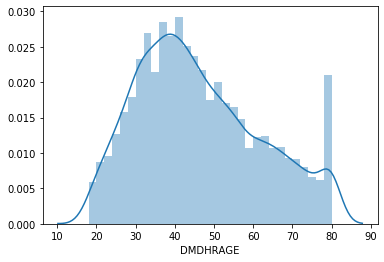

In [28]:
sns.distplot(da.DMDHRAGE.dropna())

Next we look at the histogram of systolic blood pressure measurements.  You can see that there is a tendency for the measurements to be rounded to the nearest 5 or 10 units.

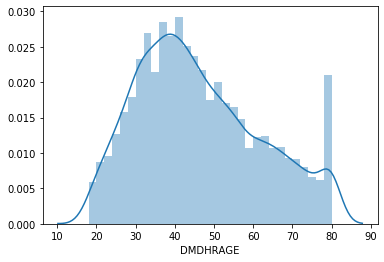

In [29]:
sns.distplot(da.DMDHRAGE.dropna())

To compare several distributions, we can use side-by-side boxplots.  Below we compare the distributions of the first and second systolic blood pressure measurements (BPXSY1, BPXSY2), and the first and second diastolic blood pressure measurements ([BPXDI1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXDI1), BPXDI2). As expected, diastolic measurements are substantially lower than systolic measurements.  Above we saw that the second blood pressure reading on a subject tended on average to be slightly lower than the first measurement.  This difference was less than 1 mm/Hg, so is not visible in the "marginal" distributions shown below.

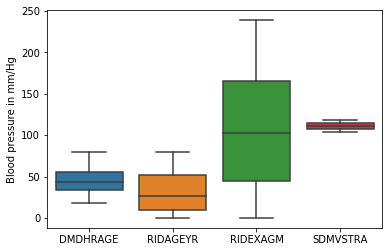

In [31]:
bp = sns.boxplot(data=da.loc[:, ["DMDHRAGE", "RIDAGEYR", "RIDEXAGM", "SDMVSTRA"]])
_ = bp.set_ylabel("Blood pressure in mm/Hg")

### Stratification

One of the most effective ways to get more information out of a dataset is to divide it into smaller, more uniform subsets, and analyze each of these "strata" on its own.  We can then formally or informally compare the findings in the different strata.  When working with human subjects, it is very common to stratify on demographic factors such as age, sex, and race.

To illustrate this technique, consider blood pressure, which is a value that tends to increase with age.  To see this trend in the NHANES data, we can [partition](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.cut.html) the data into age strata, and construct side-by-side boxplots of the systolic blood pressure (SBP) distribution within each stratum.  Since age is a quantitative variable, we need to create a series of "bins" of similar SBP values in order to stratify the data.  Each box in the figure below is a summary of univariate data within a specific population stratum (here defined by age).

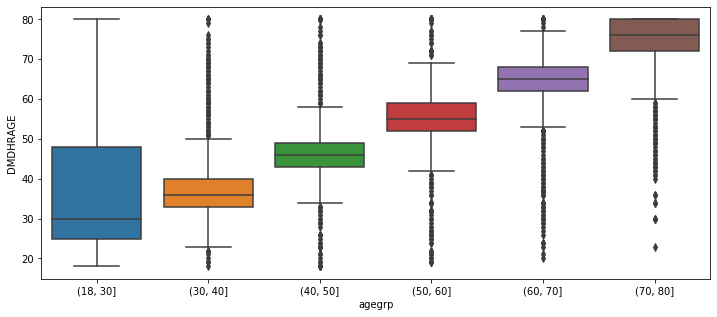

In [34]:
da["agegrp"] = pd.cut(da.RIDAGEYR, [18, 30, 40, 50, 60, 70, 80]) # Create age strata based on these cut points
plt.figure(figsize=(12, 5))  # Make the figure wider than default (12cm wide by 5cm tall)
sns.boxplot(x="agegrp", y="DMDHRAGE", data=da)  # Make boxplot of BPXSY1 stratified by age group

Taking this a step further, it is also the case that blood pressure tends to differ between women and men.  While we could simply make two side-by-side boxplots to illustrate this contrast, it would be a bit odd to ignore age after already having established that it is strongly associated with blood pressure.  Therefore, we will doubly stratify the data by gender and age.

We see from the figure below that within each gender, older people tend to have higher blood pressure than younger people.  However within an age band, the relationship between gender and systolic blood pressure is somewhat complex -- in younger people, men have substantially higher blood pressures than women of the same age.  However for people older than 50, this relationship becomes much weaker, and among people older than 70 it appears to reverse. It is also notable that the variation of these distributions, reflected in the height of each box in the boxplot, increases with age.

In [36]:
da["RIAGENDRx"] = da.RIAGENDR.replace({1: "Male", 2: "Female"})

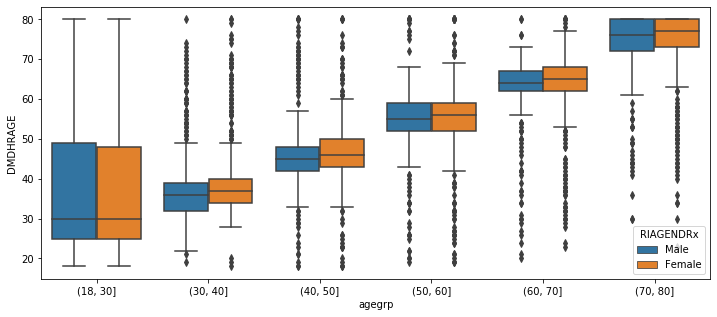

In [37]:
da["agegrp"] = pd.cut(da.RIDAGEYR, [18, 30, 40, 50, 60, 70, 80])
plt.figure(figsize=(12, 5))
sns.boxplot(x="agegrp", y="DMDHRAGE", hue="RIAGENDRx", data=da)

When stratifying on two factors (here age and gender), we can group the boxes first by age, and within age bands by gender, as above, or we can do the opposite -- group first by gender, and then within gender group by age bands.  Each approach highlights a different aspect of the data.

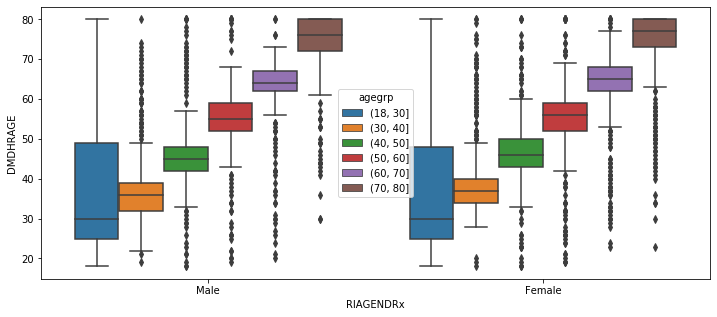

In [38]:
da["agegrp"] = pd.cut(da.RIDAGEYR, [18, 30, 40, 50, 60, 70, 80])
plt.figure(figsize=(12, 5))
sns.boxplot(x="RIAGENDRx", y="DMDHRAGE", hue="agegrp", data=da)

Stratification can also be useful when working with categorical variables.  Below we look at the frequency distribution of educational attainment ("DMDEDUC2") within 10-year age bands.  While "some college" is the most common response in all age bands, up to around age 60 the second most common response is "college" (i.e. the person graduated from college with a four-year degree). However for people over 50, there are as many or more people with only high school or general equivalency diplomas (HS/GED) than there are college graduates. 

**Note on causality and confounding:** An important role of statistics is to aid researchers in identifying causes underlying observed differences.  Here we have seen differences in both blood pressure and educational attainment based on age.  It is plausible that aging directly causes blood pressure to increase.  But in the case of educational attainment, this is actually a "birth cohort effect".  NHANES is a cross sectional survey (all data for one wave were collected at a single point in time). People who were, say, 65 in 2015 (when these data were collected), were college-aged around 1970, while people who were in their 20's in 2015 were college-aged in around 2010 or later.  Over the last few decades, it has become much more common for people to at least begin a college degree than it was in the past.  Therefore, younger people as a group have higher educational attainment than older people as a group.  As these young people grow older, the cross sectional relationship between age and educational attainment will change.

In [39]:
da.groupby("agegrp")["DMDEDUC2x"].value_counts()

agegrp    DMDEDUC2x      
(18, 30]  Some college/AA    421
          HS/GED             246
          College            211
          9-11               165
          Missing            153
          <9                  28
          Refused              2
(30, 40]  Some college/AA    312
          College            301
          HS/GED             215
          9-11               112
          <9                  48
          Don't know           1
(40, 50]  College            304
          Some college/AA    295
          HS/GED             215
          9-11               141
          <9                  76
          Don't know           1
(50, 60]  Some college/AA    277
          College            239
          HS/GED             213
          9-11               131
          <9                  86
(60, 70]  Some college/AA    255
          HS/GED             217
          College            187
          9-11               126
          <9                 117
          Don't k

We can also stratify jointly by age and gender to explore how educational attainment varies by both of these factors simultaneously.  In doing this, it is easier to interpret the results if we [pivot](https://pandas.pydata.org/pandas-docs/stable/reshaping.html#reshaping-by-stacking-and-unstacking) the education levels into the columns, and normalize the counts so that they sum to 1.  After doing this, the results can be interpreted as proportions or probabilities.  One notable observation from this table is that for people up to age around 60, women are more likely to have graduated from college than men, but for people over aged 60, this relationship reverses.

In [40]:
dx = da.loc[~da.DMDEDUC2x.isin(["Don't know", "Missing"]), :]  # Eliminate rare/missing values
dx = dx.groupby(["agegrp", "RIAGENDRx"])["DMDEDUC2x"]
dx = dx.value_counts()
dx = dx.unstack() # Restructure the results from 'long' to 'wide'
dx = dx.apply(lambda x: x/x.sum(), axis=1) # Normalize within each stratum to get proportions
print(dx.to_string(float_format="%.3f"))  # Limit display to 3 decimal places

DMDEDUC2x           9-11    <9  College  HS/GED  Refused  Some college/AA
agegrp   RIAGENDRx                                                       
(18, 30] Female    0.153 0.022    0.186   0.193    0.004            0.442
         Male      0.155 0.030    0.208   0.266      NaN            0.342
(30, 40] Female    0.102 0.048    0.317   0.189      NaN            0.344
         Male      0.126 0.049    0.291   0.249      NaN            0.285
(40, 50] Female    0.130 0.072    0.304   0.192      NaN            0.301
         Male      0.144 0.075    0.284   0.228      NaN            0.269
(50, 60] Female    0.111 0.074    0.245   0.228      NaN            0.342
         Male      0.167 0.109    0.261   0.222      NaN            0.241
(60, 70] Female    0.137 0.121    0.182   0.247      NaN            0.313
         Male      0.142 0.140    0.235   0.233      NaN            0.249
(70, 80] Female    0.162 0.126    0.211   0.231      NaN            0.270
         Male      0.116 0.116    0.28